In [29]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict 

In [30]:
train_data = json.load(open('Dataset/train.json'))
test_data = json.load(open('Dataset/test.json'))
val_data = json.load(open('Dataset/val.json'))
given_train = json.load(open('Dataset/Subtask_1_train.json'))

### Visualizing Train Dataset

#### Lengths of Conversation

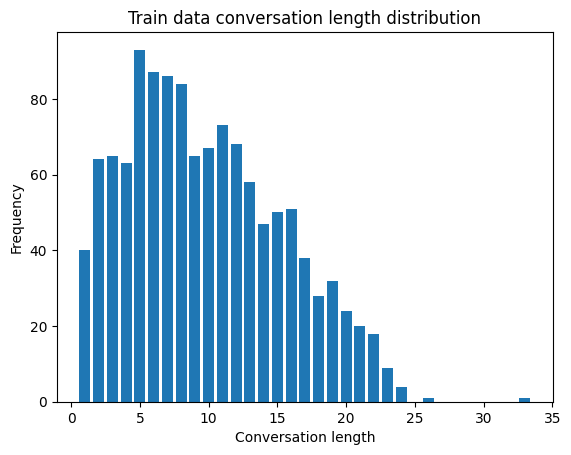

Max Conversation Length in Train Data:  33
Min Conversation Length in Train Data:  1


In [31]:
train_lengths = [len(conversation['conversation']) for conversation in train_data]
unique_train_lengths, train_freq = np.unique(train_lengths, return_counts=True) 

plt.bar(unique_train_lengths, train_freq)
plt.title('Train data conversation length distribution')
plt.xlabel('Conversation length')
plt.ylabel('Frequency')
plt.show()

print("Max Conversation Length in Train Data: ", max(train_lengths))
print("Min Conversation Length in Train Data: ", min(train_lengths))

#### Emotion Label Distribution

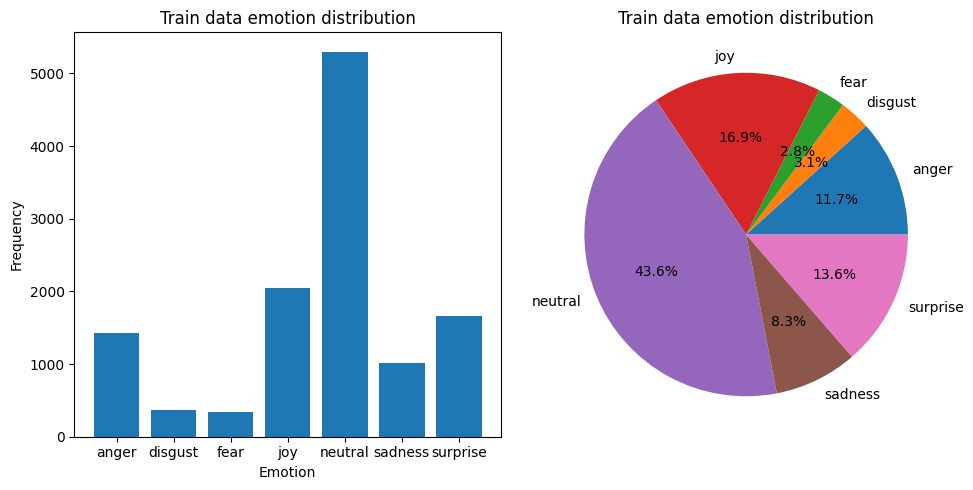

In [32]:
train_emotions = []
for conversation in train_data:
    for utterance in conversation['conversation']:
        train_emotions.append(utterance['emotion'])

unique_train_emotions, train_freq = np.unique(train_emotions, return_counts=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(unique_train_emotions, train_freq)
axs[0].set_title('Train data emotion distribution')
axs[0].set_xlabel('Emotion')
axs[0].set_ylabel('Frequency')
axs[1].pie(train_freq, labels=unique_train_emotions, autopct='%1.1f%%')
axs[1].set_title('Train data emotion distribution')
plt.tight_layout()
plt.show()

### Visualizing Validation Dataset

#### Lengths of Conversation

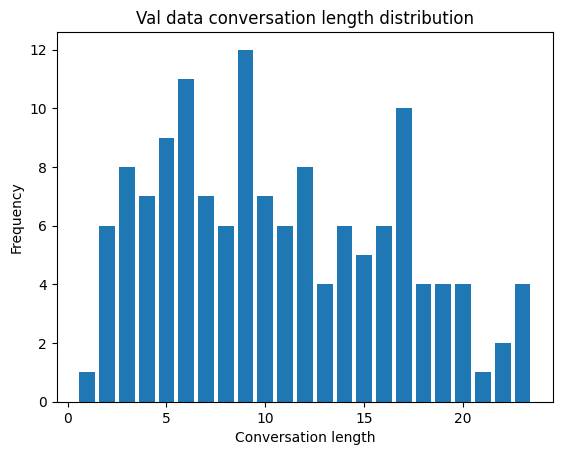

Max Conversation Length in Val Data:  23
Min Conversation Length in Val Data:  1


In [33]:
val_lengths = [len(conversation['conversation']) for conversation in val_data]
unique_val_lengths, val_freq = np.unique(val_lengths, return_counts=True) 

plt.bar(unique_val_lengths, val_freq)
plt.title('Val data conversation length distribution')
plt.xlabel('Conversation length')
plt.ylabel('Frequency')
plt.show()

print("Max Conversation Length in Val Data: ", max(val_lengths))
print("Min Conversation Length in Val Data: ", min(val_lengths))

#### Emotion Label Distribution

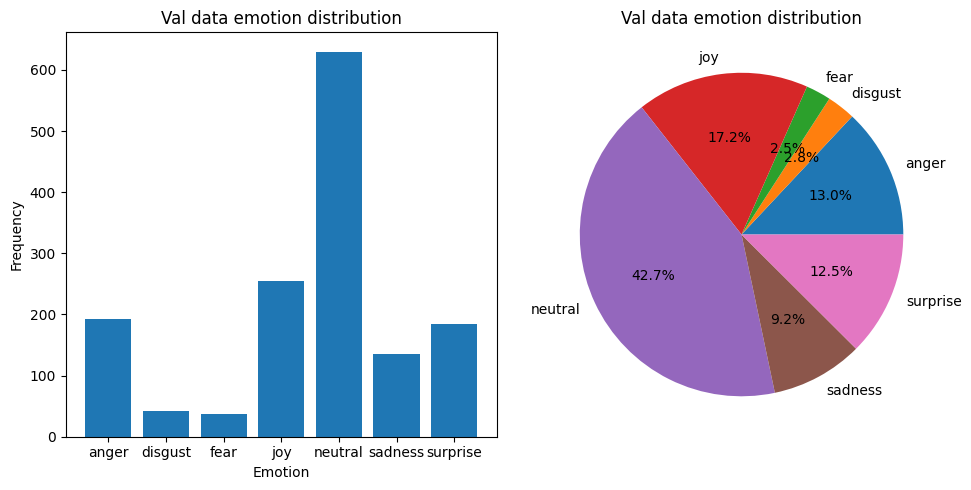

In [34]:
val_emotions = []
for conversation in val_data:
    for utterance in conversation['conversation']:
        val_emotions.append(utterance['emotion'])

unique_val_emotions, val_freq = np.unique(val_emotions, return_counts=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(unique_val_emotions, val_freq)
axs[0].set_title('Val data emotion distribution')
axs[0].set_xlabel('Emotion')
axs[0].set_ylabel('Frequency')
axs[1].pie(val_freq, labels=unique_val_emotions, autopct='%1.1f%%')
axs[1].set_title('Val data emotion distribution')
plt.tight_layout()
plt.show()

### Visualizing Test Dataset

#### Lengths of Conversation

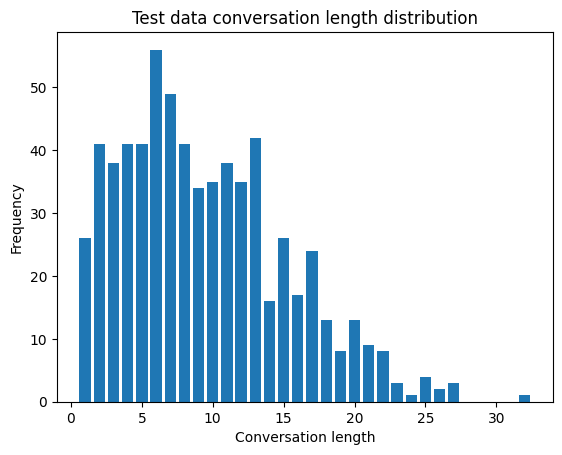

Max Conversation Length in Test Data:  32
Min Conversation Length in Test Data:  1


In [35]:
test_lengths = [len(conversation['conversation']) for conversation in test_data]
unique_test_lengths, test_freq = np.unique(test_lengths, return_counts=True) 

plt.bar(unique_test_lengths, test_freq)
plt.title('Test data conversation length distribution')
plt.xlabel('Conversation length')
plt.ylabel('Frequency')
plt.show()

print("Max Conversation Length in Test Data: ", max(test_lengths))
print("Min Conversation Length in Test Data: ", min(test_lengths))

## Transitions of Strong Emotions

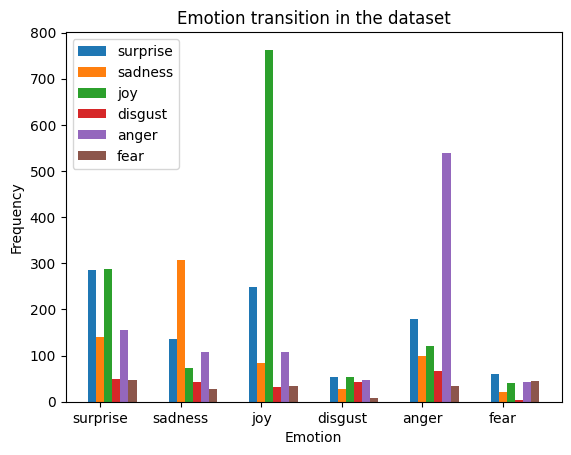

In [38]:
# Not including 'neutral' because it represents a lack of strong emotion. 
''' 
Using this plot, we are attempting to illustrate that the transitions between strong emotions are not random. Many of the transitions occur between the same 
emotions. 'Disgust' and 'fear' have low presence in the dataset therefore, they do not demonstrate the pattern of transitions as clearly as other emotions. 
'''

pair_emotion = defaultdict(lambda: defaultdict(int))
for conversation in given_train:
    for i in range(1, len(conversation['conversation'])):
        prev_emotion = conversation['conversation'][i-1]['emotion']
        current_emotion = conversation['conversation'][i]['emotion']
        if(prev_emotion != 'neutral' and current_emotion != 'neutral'):
            pair_emotion[prev_emotion][current_emotion] += 1

index = range(len(pair_emotion.keys()))
keys = list(pair_emotion.keys())
for key in keys:
    freq = [pair_emotion[key][k] for k in keys]
    plt.bar(index, freq, 0.1, label=key)
    index = [i + 0.1 for i in index]

plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Emotion transition in the dataset')
plt.xticks([i + 0.1 for i in range(len(pair_emotion.keys()))], pair_emotion.keys())
plt.legend()
plt.show()   